# Notes - Python arrays

## Numeric operation on array

Even though all elements are numeric values in a array, Python doesn't think it is a numeric array. As a result, I cannot do numerical operation in this array. I have to convert the array to a numpy array, so I can do numeric operation.

- **Numpy array nerical operations**
 - Unidata - Numpy Basics, https://unidata.github.io/python-training/workshop/NumPy/numpy-basics/
 - Unidata - Numpy Intermidiate, https://unidata.github.io/python-training/workshop/NumPy/intermediate-numpy/
 - Unidata - Broadcasting and Vectorization, https://unidata.github.io/python-training/workshop/NumPy/numpy-broadcasting-and-vectorization/
 - Numpy basics - https://numpy.org/devdocs/user/absolute_beginners.html
 - Scipy - https://scipy-lectures.org/intro/numpy/operations.html
 
Recommended learning order: (1) Unidata Numpy Basics (2) Numpy basics


## Learning objective
- Create an array with any dimention. Set attributes and coordinates to this array.
- Do numerical operations on this array, and with other arrays.

- broadcasting



## Numpy

In NumPy, dimensions are called **axes**. This means that if you have a 2D array that looks like this:

[0., 0., 0.] \
[1., 1., 1.]

Your array has 2 axes. The first axis has a length of 2 (rows) and the second axis has a length of 3 (columns), i.e. matrix(2,3)

In [1]:
import numpy as np

## Create an array and check out its characteristics 

In [2]:
#--- create arrays from a list

a_1d = np.array([1, 2, 3])          # a 1-D array
a_2d = np.array([[1,2,3],[4,5,6]])  # a (2,3) array

#--- create arrays from functions
#      arange(start, stop, interval) creates a range of values in the interval [start,stop) with step spacing.
#      linspace(start, stop, num) creates a range of num evenly spaced values over the range [start,stop].
b_1d_01 = np.arange(3)         # [0 1 2]
b_1d_02 = np.arange(1,4)       # [0 1 2 3]
b_1d_03 = np.arange(1,6,2)     # [1 3 5]

b_1d_11 = np.linspace(1,5,5)   # [1 2 3 4 5], 5 elements
b_1d_12 = np.linspace(1,2,3)   # [1 1.5 2],   3 elements

#--- create n-dimentional arrays
row=5  
col=3
c_nd_01 = np.zeros(row*col).reshape(row,col)
c_nd_02 = np.ones(row*col).reshape(row,col)
c_nd_02 = np.empty(row*col).reshape(row,col)

#--- Make a copy of the array
x = np.array([10.,20.,25.,30.])
x2 = x.copy()
print(x)
print(x2)

#--- check out array properties
print(a_2d.ndim)    # See how many dimensions the array has
print(a_2d.shape)   # Print out the shape attribute
print(a_2d.dtype)   # Print out the data type attribute

print(c_nd_01.shape)

[10. 20. 25. 30.]
[10. 20. 25. 30.]
2
(2, 3)
int64
(5, 3)


## Useful operations 

### 1. taking differences in array elements

In [3]:
########################################
# taking differences in array elements
########################################

#--- Given the original array, get another array where the values are the mean of each pair of values
plev = np.array([10.,20.,25.,30.])
play = (plev[1:] + plev[:-1]) / 2

print(plev[1:])
print(plev[:-1])
print(plev)
print(play)

#--- Calculate the n-th discrete difference along the given axis.
print("np.diff")
print(np.diff(plev))


#--- The differences between consecutive elements of an array.
#     The returned array is always 1D.
print("np.ediff1d")
y = [[1, 2, 4], [1, 6, 24]]
print(np.ediff1d(y))

[20. 25. 30.]
[10. 20. 25.]
[10. 20. 25. 30.]
[15.  22.5 27.5]
np.diff
[10.  5.  5.]
np.ediff1d
[ 1  2 -3  5 18]


### 2. Indexing Arrays with Boolean Values
https://unidata.github.io/python-training/workshop/NumPy/intermediate-numpy/#2.-Indexing-Arrays-with-Boolean-Values


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[69.89825854 71.52313905 69.90028363 66.73828667 66.77980233 72.91468564
 69.34603239 69.09533591 68.27350814 64.33916721 67.49497791 67.05282372
 63.51829518 63.54034678 65.46576463 62.99683836 59.27662304 61.29361272
 60.51641586 57.46048995 55.19793004 53.07572989 54.47998158 53.09552107
 54.59037269 47.84272747 49.1435589  45.87151534 45.11976794 45.009292
 46.36021141 46.87557425 47

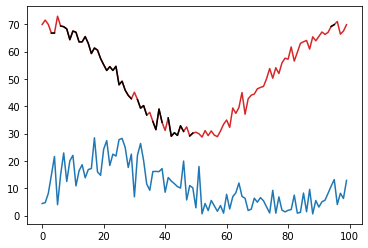

In [4]:
#########################################
# Indexing Arrays with Boolean Values
#   https://unidata.github.io/python-training/workshop/NumPy/intermediate-numpy/
#########################################

import numpy as np
import matplotlib.pyplot as plt

#--- Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        50 + 2 * np.random.randn(100))
spd = (np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) +
              10 + 5 * np.random.randn(100)))

#--- plot
plt.plot(temp, 'tab:red')
plt.plot(spd, 'tab:blue')

#--- find which element satisfy the criteria
print(temp > 45.)
print(temp[temp > 45.])    # print out temp value for those temp > 45.
print(temp[spd > 10])      # rint out temp value for those spd > 10
print(temp[(temp < 45) & (spd > 10)])  # print out temp value for those temp > 45. & spd > 10

#--- modify elements if necessary
temp2 = temp.copy()
temp2[spd < 10] = np.nan
plt.plot(temp2, 'black')

### 3. Indexing using arrays of indices
https://unidata.github.io/python-training/workshop/NumPy/intermediate-numpy/#3.-Indexing-using-arrays-of-indices

In [5]:
#--- use argsort to the indices of the array that give the items in sorted order
x = np.array([1., 5., 2., 7., 3.])
inds = np.argsort(x)

print("original array")
print(x)
print("sort indices")
print(inds)
print(x[inds])

original array
[1. 5. 2. 7. 3.]
sort indices
[0 2 4 1 3]
[1. 2. 3. 5. 7.]


## Adding and sorting elements
https://numpy.org/devdocs/user/absolute_beginners.html#adding-removing-and-sorting-elements

In [6]:
a = np.array([1, 3, 5, 4])
b = np.array([2, 6, 9, 8])

#--- sort array
np.sort(a)

#--- concatenate arrays
np.concatenate((a,b),axis=0)

array([1, 3, 5, 4, 2, 6, 9, 8])

## Convert a 1D array into a 2D array (how to add a new axis to an array)
https://numpy.org/devdocs/user/absolute_beginners.html#how-to-convert-a-1d-array-into-a-2d-array-how-to-add-a-new-axis-to-an-array

In [7]:
#--- use nexaxis 
a1 = np.array([1, 2, 3, 4, 5, 6])
a2 = a[:,np.newaxis]
a3 = a[np.newaxis,np.newaxis,:]

print(a1.shape)
print(a2.shape)
print(a3.shape)

#--- use expand_dims
b1 = np.expand_dims(a, axis=0)
b2 = np.expand_dims(a, axis=1)
print('--------------')
print(b1.shape)
print(b2.shape)

(6,)
(4, 1)
(1, 1, 4)
--------------
(1, 4)
(4, 1)


## Broadcasting

- Unidata - Broadcasting and Vectorization, https://unidata.github.io/python-training/workshop/NumPy/numpy-broadcasting-and-vectorization/
- Numpy - https://numpy.org/devdocs/user/basics.broadcasting.html#basics-broadcasting
- Numpy - https://numpy.org/devdocs/user/absolute_beginners.html#broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.

======== \
My understanding: \
A nice diagram in Numpy: https://numpy.org/devdocs/user/basics.broadcasting.html#broadcastable-arrays

Let's say there are two arrays: arr1[M] and arr2[N]. It is impossible to add elements from arr1 to arr2 because they have different shapes. So, np.newaxis can "broadcast" a new array as arr3[MxN]. Each element can be arithemetic operations of arr1 and arr2.  

See Exercises below.

In [8]:
### b is added to each row of a
a = np.array([1.,2.,3.])
b = np.array([[1.,2.,3.],
              [4.,5.,6.]])

a+b

array([[2., 4., 6.],
       [5., 7., 9.]])

In [9]:
### pairwise addition of two arrays with different dimensions ###

#--- example arrays
a = np.array([1.,2.,3.,4.,5])
b = np.array([10., 20., 30., 40.])

a+b

ValueError: operands could not be broadcast together with shapes (5,) (4,) 

Use loops to add these two arrays

In [10]:
#--- a.shape is a tuple. To convert it to an integer, use a.shape[0]
a_plus_b = np.empty((a.shape[0],b.shape[0]), dtype=a.dtype)

#--- enumerate returns [index, value]
for col, valb in enumerate(b):
    for row, vala in enumerate(a):
        a_plus_b[row, col] = vala + valb

a_plus_b

array([[11., 21., 31., 41.],
       [12., 22., 32., 42.],
       [13., 23., 33., 43.],
       [14., 24., 34., 44.],
       [15., 25., 35., 45.]])

Use newaxis

In [11]:
#--- add two 1-D arrays

a_plus_b = a + b[:, np.newaxis]   # original array values are on rows
print(a_plus_b)
print(a_plus_b.shape)

b_plus_a = b + a[:, np.newaxis]   
print(b_plus_a)
print(b_plus_a.shape)


[[11. 12. 13. 14. 15.]
 [21. 22. 23. 24. 25.]
 [31. 32. 33. 34. 35.]
 [41. 42. 43. 44. 45.]]
(4, 5)
[[11. 21. 31. 41.]
 [12. 22. 32. 42.]
 [13. 23. 33. 43.]
 [14. 24. 34. 44.]
 [15. 25. 35. 45.]]
(5, 4)


In [12]:
#--- add multiple n-D arrays
x = np.array([1, 2])
y = np.array([3, 4, 5])
z = np.array([6, 7, 8, 9])

d_2d = x[:, np.newaxis]**2 + y**2  # (row=2, columne=3) array
print("d_2d")
print(d_2d)

d_3d = d_2d[..., np.newaxis] + z
print("")
print("d_3d")
print(d_3d)
print(d_3d.shape)

d_2d
[[10 17 26]
 [13 20 29]]

d_3d
[[[16 17 18 19]
  [23 24 25 26]
  [32 33 34 35]]

 [[19 20 21 22]
  [26 27 28 29]
  [35 36 37 38]]]
(2, 3, 4)


## Exercise 1: Given the 3D temperature field and 1-D pressure coordinates, calculate: 𝑇∗𝑒𝑥𝑝(𝑃/1000) 

In [13]:
pressure = np.array([1000, 850, 500, 300])
temps = np.linspace(20, 30, 24).reshape(4, 3, 2)  # regard as (time, lat, lon)

thetas = temps * np.exp(pressure[:, np.newaxis, np.newaxis] / 1000.)

print("temps")
print(temps)

print("thetas")
print(thetas)

tt, ii, jj= 1, 1, 1
print(temps[tt,ii,jj])
print(thetas[tt,ii,jj])

temps
[[[20.         20.43478261]
  [20.86956522 21.30434783]
  [21.73913043 22.17391304]]

 [[22.60869565 23.04347826]
  [23.47826087 23.91304348]
  [24.34782609 24.7826087 ]]

 [[25.2173913  25.65217391]
  [26.08695652 26.52173913]
  [26.95652174 27.39130435]]

 [[27.82608696 28.26086957]
  [28.69565217 29.13043478]
  [29.56521739 30.        ]]]
thetas
[[[54.36563657 55.54749823]
  [56.7293599  57.91122156]
  [59.09308323 60.27494489]]

 [[52.89636361 53.91360137]
  [54.93083913 55.94807689]
  [56.96531466 57.98255242]]

 [[41.57644944 42.29328477]
  [43.01012011 43.72695544]
  [44.44379078 45.16062611]]

 [[37.56128856 38.14818369]
  [38.73507883 39.32197396]
  [39.90886909 40.49576423]]]
23.91304347826087
55.948076893882394


## Exercise 2: Given the 2D surface pressure and two 1-D  hybrid coefficients (pk, bk), calculate pressure at each level: P=pk+bk*ps

In [14]:
#--- given ps, pk, and bk values
ps = np.array([[800., 900., 1000.], [500., 600., 700.]])  # ps is a 2-D array
#ps = np.array([800.])                                    # ps is a 1-D array

pk = np.array([0., 10., 20., 30.])
bk = np.array([0.1, 0.2, 0.3, 0.4])

#--- compute p = pk + bk*ps
plev = pk + ps[..., np.newaxis]*bk

print(ps.shape)
print(plev.shape)

#--- print out element value
ii, jj = 0,0
print(ps[ii,jj])
print(plev[ii,jj,:])

(2, 3)
(2, 3, 4)
800.0
[ 80. 170. 260. 350.]
